<a href="https://colab.research.google.com/github/BmMn/Manlai/blob/master/Video_analysis_enkhmanlai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2 
import math
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd 

import tensorflow 
import numpy as np
from keras.preprocessing import image 

from keras.utils import np_utils
from skimage.transform import resize

Using TensorFlow backend.


In [0]:
count = 0
videoFile = "Tom and jerry.mp4"

cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5)

x=1 

while(cap.isOpened()):
    frameId = cap.get(1) 
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="/home/enkhmanlai/Desktop/Video Analysis/FrameDataTrain/frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Duuslaa!")

Duuslaa!


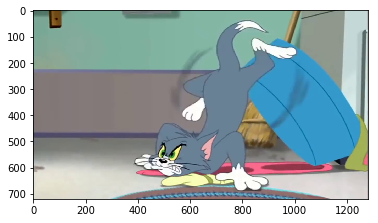

In [0]:
img = plt.imread('frame10.jpg')
plt.imshow(img)

In [0]:
data = pd.read_csv('mapping.csv')
data.head()

,Image_ID,Class
0,frame0.jpg,1
1,frame1.jpg,1
2,frame2.jpg,2
3,frame3.jpg,2
4,frame4.jpg,2


Энэ алхамд Image_ID дээр үндэслэж  зургуудыг уншина.

In [0]:
X=[] # хоосон массив үүсгэх

for img_name in data.Image_ID:
  img=plt.imread('/home/enkhmanlai/Desktop/Video Analysis/FrameDataTrain/'+img_name)
  X.append(img) #Зураг бүрийг Х массаар нь хадгалах

X=np.array(X) # жагсаалтыг массив болгон хувиргах


In [0]:
y= data.Class
dummy_y=np_utils.to_categorical(y)

3 ангилал байгаа тул keras.utils сангийн  to_categorical () Функц ашинлан тэдгээрийг кодчилно.


Бид VGG16 гэх урьдчилан бэлтгэсэн загварыг ашиглах бөгөөд энэ нь нэг хэмжээстэй оролтын дүрсийг шаарддаг (224 X 224 X 3). Бидний зургууд өөр өөр хэмжээтэй учраас бид бүгдийг нь бүгдийг нь өөрчилж нэг хэмжээтэй болгох хэрэгтэй. Үүнийг хийхийн тулд skimage.transform-ийн resize () функцыг ашиглах болно .

In [0]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      
    image.append(a)
X = np.array(image)

/home/enkhmanlai/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/enkhmanlai/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Бүх зургууд 224 X 224X 3-ийн хэмжээтэй болж өөрчлөгдсөн байна. Гэхдээ загварт оруулахаас өмнө бид загварыг шаардлагын дагуу боловсруулсан байх ёстой. Үгүй бол загвар нь хангалттай сайн гүйцэтгэх боломжгүй. Энэ алхамыг хийхийн тулд keras.applications.vgg16 гэсэн preprocess_input () функцийг  ашиглана .

In [0]:

from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X, mode='tf')

Мөн харагдахгүй зурган дээрх загварын гүйцэтгэлийг шалгахын тулд баталгаажуулалтын багц шаардлагатай болно. Бид sklearn.model_selection модулийн train_test_split () функцийг ашиглан сургалт, баталгаажуулалтын багцыг санамсаргүй байдлаар хуваахын тулд ашиглах болно .

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,dummy_y,test_size = 0.3, random_state=43)
# Баталгаажуулалтын багцыг бэлтгэх нь

**Моделоо сургацгаая Pink KIwi**

Дээр дурдсандаа VGG16 гэдэг урьдчилан бэлдсэн загварийг ашиглах болно. Сангаа оруулж ирцгээе.

In [0]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Dropout

Бид одоо VGG16 урьдчилан тогтоосон загварыг ачаалж base_model хэлбэрээр хадгалах болно.

In [0]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) 

X_train болон X_valid-ийн хувьд энэ загварыг ашиглан таамаглалуудыг хийж , функцийг олж, дараа нь тэдгээрийг давтан сургах загварыг ашиглана.



In [0]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)

X_train.shape, X_valid.shape

((208, 7, 7, 512), (90, 7, 7, 512))

X_train ба X_valid хэлбэр нь (208, 7, 7, 512), (90, 7, 7, 512) тус тус байна. NN сургахын тулд эдгээр утгуудыг 1 хэмжээстрүү хөрвүүлнэ.

In [0]:
X_train = X_train.reshape(208, 7*7*512)      # converting to 1-D
X_valid = X_valid.reshape(90, 7*7*512)

Одоо зурагнуудаа урьдчилан боловсруулж, загварыг нэгтгэхэд тусалдаг

In [0]:
train = X_train/X_train.max() 
X_valid = X_valid / X_train.max()


1.   Энэ model-ийг бүтээх
2.   Model-ийг эмхэтгэх

*    Model-ийг сургах

Энэ дарааллын дагуу ажилна.


In [0]:
model = Sequential() 

model.add(InputLayer((7*7*512,)))
model.add(Dense(units=1024, activation='sigmoid')) # hidden layer

model.add(Dense(units=512, activation = 'sigmoid'))
model.add(Dropout(0.5))

model.add(Dense(units=256, activation = 'sigmoid'))
model.add(Dropout(0.5))


model.add(Dense(units=128, activation = 'sigmoid'))
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax')) 


Summary () функцийг ашиглан model-ийг нэгтгэж үзье .

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

1024 hidden layer-тэй NN, Гаралтын  3 N давхарга үүссэн байна. 

Заа ингээд эмхтгэнээ.

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Баталгаажуулалтын зургуудаар шалгаад сургацгаая.

In [0]:
model.fit(train, y_train,epochs=100, validation_data=(X_valid,y_valid))

Train on 208 samples, validate on 90 samples
Epoch 1/100
208/208 [==============================] - 2s 10ms/step - loss: 1.1672 - acc: 0.3942 - val_loss: 1.1217 - val_acc: 0.3444
Epoch 2/100
208/208 [==============================] - 2s 8ms/step - loss: 1.2005 - acc: 0.3558 - val_loss: 1.0949 - val_acc: 0.3444
Epoch 3/100
208/208 [==============================] - 2s 8ms/step - loss: 1.2314 - acc: 0.3462 - val_loss: 1.1202 - val_acc: 0.3444
Epoch 4/100
208/208 [==============================] - 2s 8ms/step - loss: 1.1610 - acc: 0.4038 - val_loss: 1.1262 - val_acc: 0.3444
Epoch 5/100
208/208 [==============================] - 2s 8ms/step - loss: 1.1273 - acc: 0.4135 - val_loss: 1.1081 - val_acc: 0.3444
Epoch 6/100
208/208 [==============================] - 2s 8ms/step - loss: 1.1271 - acc: 0.4183 - val_loss: 1.0604 - val_acc: 0.4889
Epoch 7/100
208/208 [==============================] - 2s 8ms/step - loss: 1.1394 - acc: 0.4519 - val_loss: 1.0312 - val_acc: 0.4778
Epoch 8/100
208/208 [==

Epoch 62/100
208/208 [==============================] - 2s 8ms/step - loss: 0.0048 - acc: 1.0000 - val_loss: 0.9654 - val_acc: 0.8000
Epoch 63/100
208/208 [==============================] - 2s 8ms/step - loss: 0.0042 - acc: 1.0000 - val_loss: 0.9491 - val_acc: 0.8000
Epoch 64/100
208/208 [==============================] - 2s 8ms/step - loss: 0.0046 - acc: 1.0000 - val_loss: 0.9446 - val_acc: 0.8222
Epoch 65/100
208/208 [==============================] - 2s 8ms/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.9478 - val_acc: 0.8222
Epoch 66/100
208/208 [==============================] - 2s 8ms/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.9424 - val_acc: 0.8222
Epoch 67/100
208/208 [==============================] - 2s 8ms/step - loss: 0.0035 - acc: 1.0000 - val_loss: 0.9401 - val_acc: 0.8222
Epoch 68/100
208/208 [==============================] - 2s 8ms/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.9415 - val_acc: 0.8222
Epoch 69/100
208/208 [==============================] - 2s 8ms

In [0]:
count = 0
videoFile = "test data.mp4"

cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5)

x=1 

while(cap.isOpened()):
    frameId = cap.get(1) 
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="/home/enkhmanlai/Desktop/Video Analysis/FrameDataTest/test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Duuslaa!")

Duuslaa!


In [0]:
test = pd.read_csv('test.csv')
test.head()

,Image_ID
0,test0.jpg
1,test1.jpg
2,test2.jpg
3,test3.jpg
4,test4.jpg


In [0]:
img = plt.imread('test0.jpg')
plt.imshow(img)

FileNotFoundError: [Errno 2] No such file or directory: 'test0.jpg'

In [0]:
test_image=[]

for img_name in test.Image_ID:
  img=plt.imread('/home/enkhmanlai/Desktop/Video Analysis/FrameDataTest/'+img_name)
  test_image.append(img)

test_img=np.array(test_image)

In [0]:
test_image = []

for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)

In [0]:
# preprocessing the images
test_image = preprocess_input(test_image, mode='tf')

# extracting features from the images using pretrained model
test_image = base_model.predict(test_image)

# converting the images to 1-D form
test_image = test_image.reshape(186, 7*7*512)

# zero centered images
test_image = test_image/test_image.max()

In [0]:
predictions = model.predict_classes(test_image)

In [0]:
print(" jerry ",predictions[predictions==1].shape[0],"udaa garsan")
print(" TOm ",predictions[predictions==2].shape[0],"udaa garsan")


 jerry  6 udaa garsan
 TOm  132 udaa garsan
